In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from Mod.Fits import Fits

In [2]:
with open("Data/Forzante ad omega potenza 10e16.csv", "r") as file:
    df = pd.read_csv(file, delimiter=";", decimal=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12088 entries, 0 to 12087
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Position (mm) Run #2  9408 non-null   float64
 1   Position (mm) Run #3  12088 non-null  float64
dtypes: float64(2)
memory usage: 189.0 KB


Text(0.5, 1.0, 'Misura con $\\nu = \\omega_0$')

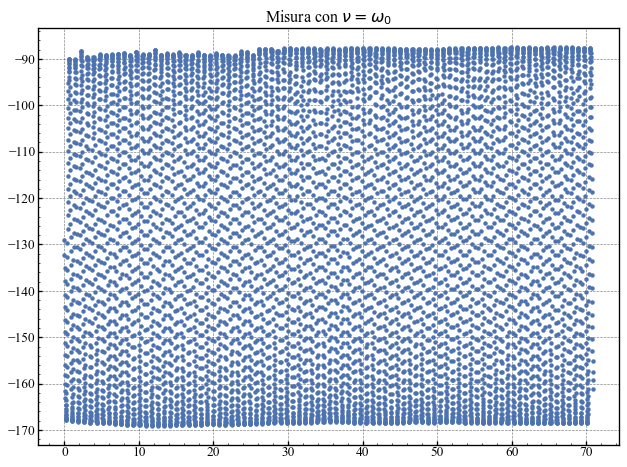

In [3]:
plt.style.use("Mod/mystyle.mplstyle")

fig, ax = plt.subplots()

Y = df.iloc[5000:, 1].to_numpy()
length = len(Y)
X = np.linspace(0, length / 100, length)

ax.scatter(X, Y)
plt.title(r"Misura con $\nu = \omega_0$")

Misura 1: mean=-129.372, pos_amplitude=8.399, neg_amplitude=8.373
Misura 2: mean=-129.308, pos_amplitude=4.132, neg_amplitude=4.144
Misura 3: mean=-129.363, pos_amplitude=2.904, neg_amplitude=2.884
Misura 4: mean=-129.537, pos_amplitude=2.157, neg_amplitude=2.215
Misura 5: mean=-128.680, pos_amplitude=2.152, neg_amplitude=2.032
Misura 6: mean=-129.158, pos_amplitude=6.260, neg_amplitude=6.220
Misura 7: mean=-129.159, pos_amplitude=3.316, neg_amplitude=3.226
Misura 8: mean=-129.282, pos_amplitude=2.071, neg_amplitude=2.079
Misura 9: mean=-129.557, pos_amplitude=1.514, neg_amplitude=1.521
Misura 10: mean=-129.341, pos_amplitude=1.191, neg_amplitude=1.206
Misura 11: mean=-129.453, pos_amplitude=1.765, neg_amplitude=1.933
Misura 12: mean=-129.012, pos_amplitude=40.989, neg_amplitude=40.284
Misura 13: mean=-129.578, pos_amplitude=3.297, neg_amplitude=3.337
Misura 14: mean=-129.685, pos_amplitude=2.479, neg_amplitude=2.480
[1.20876051 0.10286175 6.73964459]


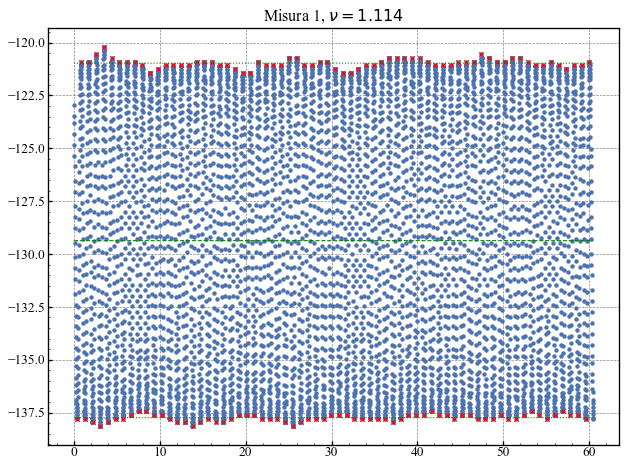

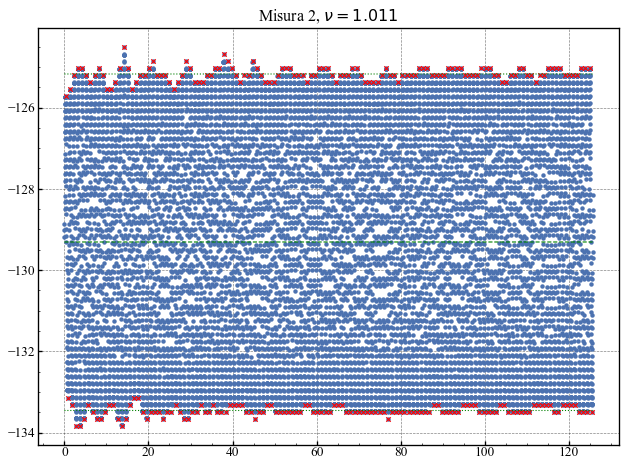

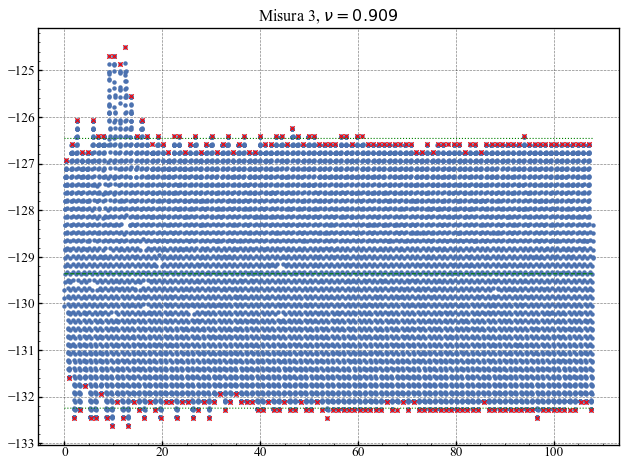

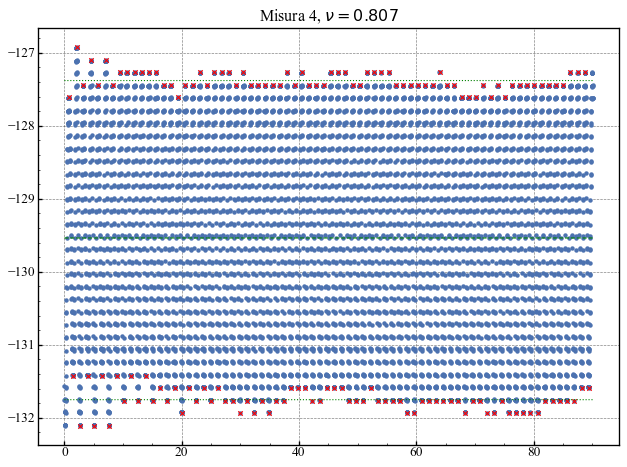

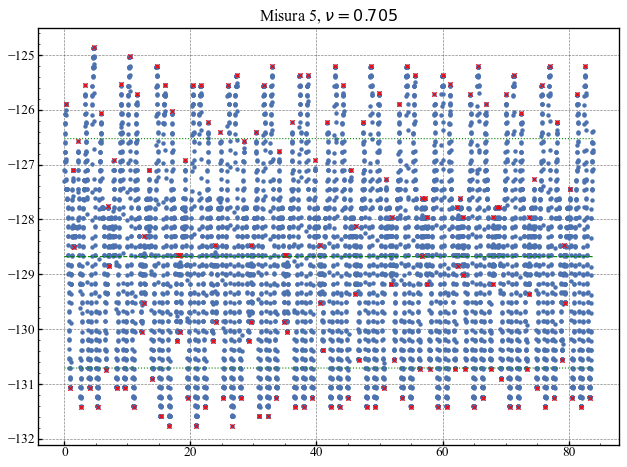

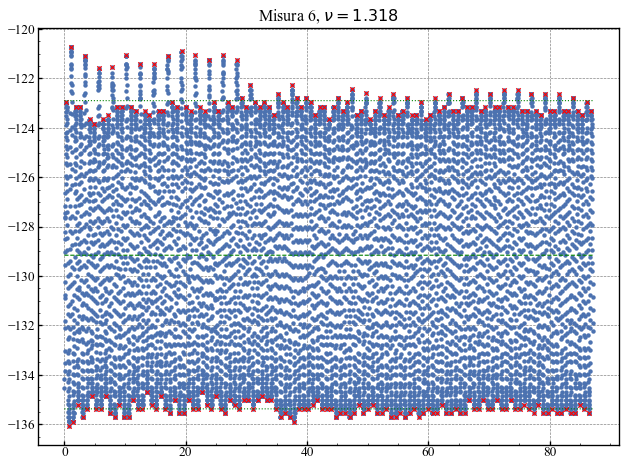

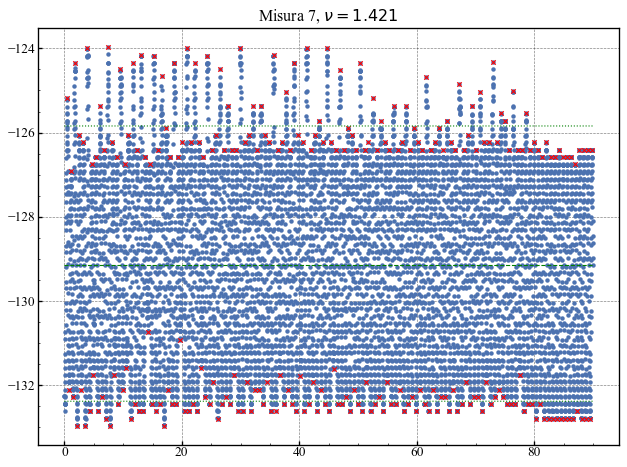

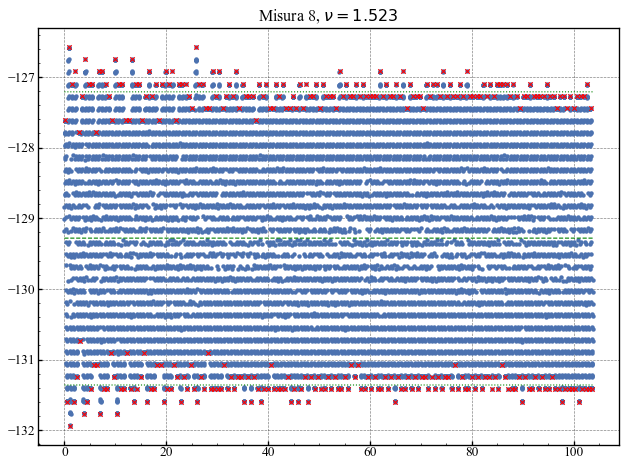

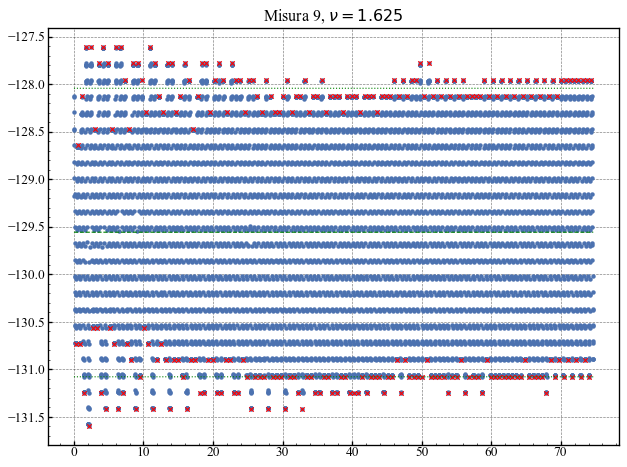

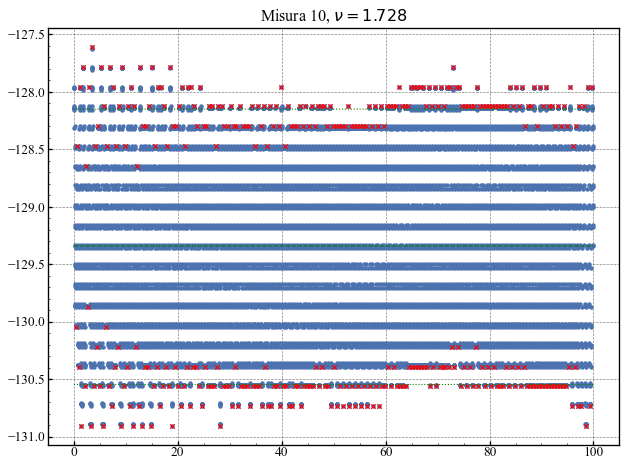

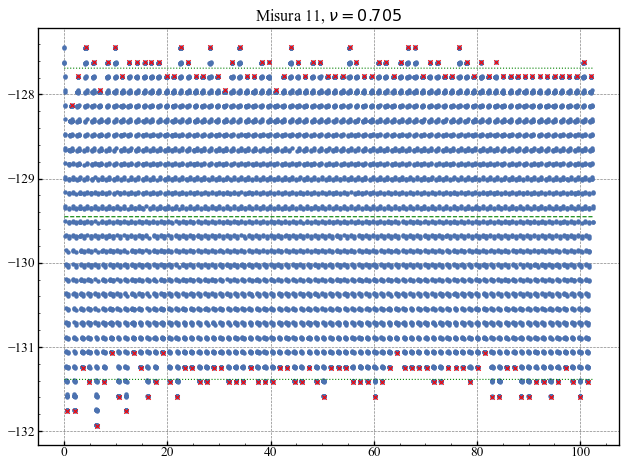

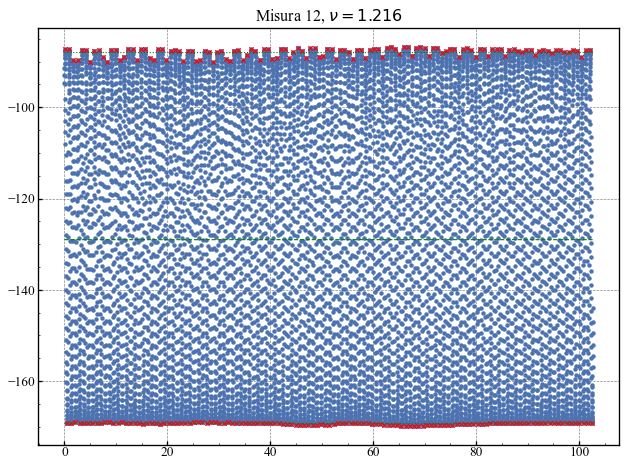

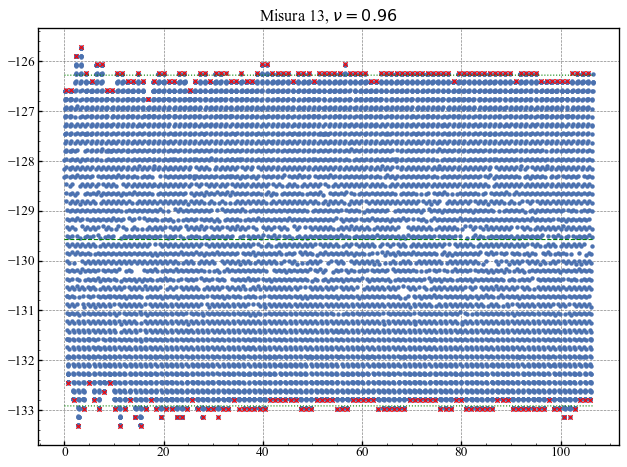

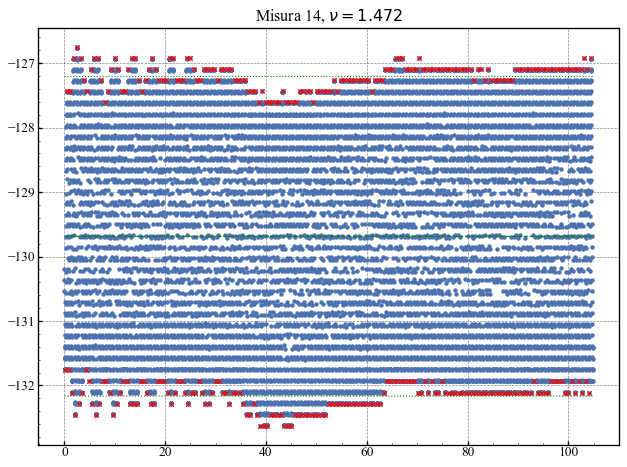

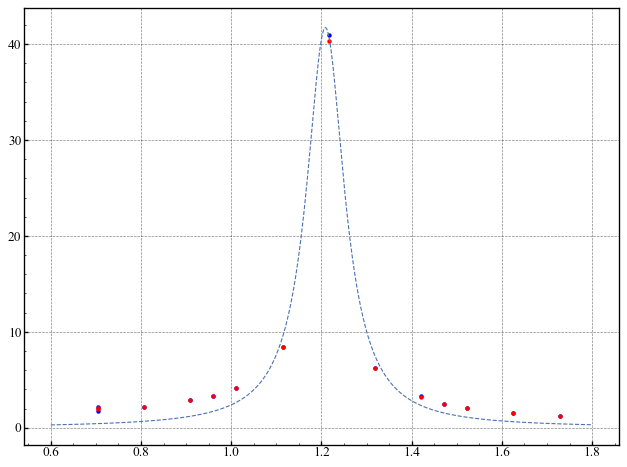

In [5]:
massa_molla = 15.44
massa_sistema = 50.15

frequenze = [
    1.114,
    1.011,
    0.909,
    0.807,
    0.705,
    1.318,
    1.421,
    1.523,
    1.625,
    1.728,
    0.705,
    1.216,
    0.960,
    1.472,
]

with open("Data/Misura forzante completa.csv", "r") as file:
    df = pd.read_csv(file, delimiter=";", decimal=",")

amplitudes = []
namplitudes = []
for i in range(len(df.iloc[0, :])):
    fig, ax = plt.subplots()
    Y = df.iloc[10000:, i].dropna().to_numpy()
    X = np.arange(len(Y)) / 100

    plt.title(rf"Misura {i+1}, $\nu = {frequenze[i]}$")
    ax.scatter(X, Y)

    pks, _ = scipy.signal.find_peaks(Y, distance=20, prominence=1)
    npks, _ = scipy.signal.find_peaks(-Y, distance=20, prominence=1)
    ax.scatter(X[pks], Y[pks], marker="x", c="r")
    ax.scatter(X[npks], Y[npks], marker="x", c="r")
    mean = np.mean(Y)
    p_mean = np.mean(Y[pks])
    np_mean = np.mean(Y[npks])
    ax.plot(X, np.zeros(len(X)) + mean, c="g", ls="--")
    ax.plot(X, np.zeros(len(X)) + p_mean, c="g", ls=":")
    ax.plot(X, np.zeros(len(X)) + np_mean, c="g", ls=":")
    print(
        f"Misura {i+1}: mean={mean:.3f}, pos_amplitude={p_mean-mean:.3f}, neg_amplitude={-np_mean+mean:.3f}"
    )
    amplitudes.append(p_mean - mean)
    namplitudes.append(mean - np_mean)

fig, ax = plt.subplots()
ax.scatter(frequenze, amplitudes, c="b")
ax.scatter(frequenze, namplitudes, c="r")


def lorentzian(x, a, b, c):
    return c * (0.5 * b / ((x - a) ** 2 + (0.5 * b) ** 2)) / np.pi


param, cov = scipy.optimize.curve_fit(
    lorentzian,
    frequenze,
    amplitudes,
    p0=[1.18, 0.05, 20],
    # sigma=[(0.01 if freq != 1.216 else 1) for freq in frequenze],
    bounds=[(1.15, 0, 1), (1.25, 0.27, 1000)],
)
std_dev = np.sqrt(np.diag(cov))
ax.plot(
    np.linspace(0.6, 1.8, 1000),
    lorentzian(np.linspace(0.6, 1.8, 1000), *param),
    ls="--",
)

ax.plot(
    np.linspace(0.6, 1.8, 1000),
    lorentzian(np.linspace(0.6, 1.8, 1000), ()),
    ls=":",
    c = "r"
)
print(param)